In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("SEER Breast Cancer Dataset .csv")
df.head()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


## DATA Cleanup

In [3]:
df.isnull().sum()

Age                          0
Race                         0
Marital Status               0
Unnamed: 3                4024
T Stage                      0
N Stage                      0
6th Stage                    0
Grade                        0
A Stage                      0
Tumor Size                   0
Estrogen Status              0
Progesterone Status          0
Regional Node Examined       0
Reginol Node Positive        0
Survival Months              0
Status                       0
dtype: int64

In [4]:
df.shape

(4024, 16)

drop the unnames columns

In [5]:
df = df.drop("Unnamed: 3",axis=1)
df.columns

Index(['Age', 'Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [6]:
df.columns = df.columns.str.strip(" ")

In [7]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A Stage                 4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   object
 10  Progesterone Status     4024 non-null   object
 11  Regional Node Examined  4024 non-null   int64 
 12  Reginol Node Positive   4024 non-null   int64 
 13  Survival Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
dtypes: i

In [9]:
df['Race'].unique()

array(['Other (American Indian/AK Native, Asian/Pacific Islander)',
       'White', 'Black'], dtype=object)

In [10]:
df['Race'] = df['Race'].replace({'Other (American Indian/AK Native, Asian/Pacific Islander)':'Others'})

In [11]:
df['Marital Status'].unique()

array(['Married (including common law)', 'Divorced',
       'Single (never married)', 'Widowed', 'Separated'], dtype=object)

In [12]:
df['Marital Status'] = df['Marital Status'].replace({'Married (including common law)':'Married','Single (never married)':'Single'})

In [13]:
df['Grade'] = df['Grade'].replace({'Well differentiated; Grade I':'Grade I',
                                  'Moderately differentiated; Grade II':'Grade II',
                                  'Poorly differentiated; Grade III':'Grade III',
                                  'Undifferentiated; anaplastic; Grade IV':'Grade IV'})

In [14]:
grade_order = ['Grade I','Grade II','Grade III','Grade IV']

In [15]:
df['Grade'] = pd.Categorical(df['Grade'],categories=grade_order,ordered=True)

In [16]:
df['A Stage'].astype('category')
df['Estrogen Status'].astype("category")
df['Progesterone Status'].astype("category")
df['Status'].astype('category')

0       Alive
1       Alive
2        Dead
3        Dead
4        Dead
        ...  
4019    Alive
4020    Alive
4021    Alive
4022    Alive
4023    Alive
Name: Status, Length: 4024, dtype: category
Categories (2, object): ['Alive', 'Dead']

## EDA

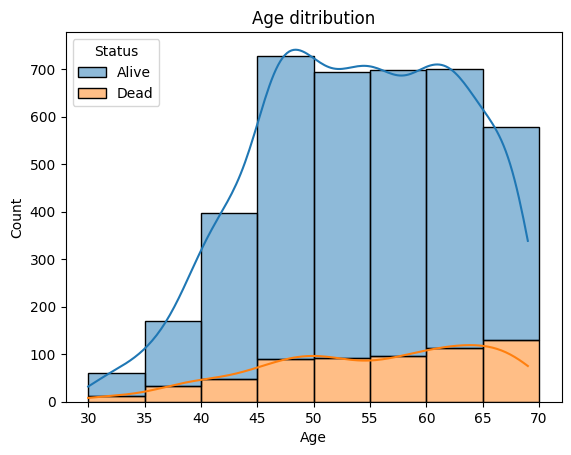

In [17]:

sns.histplot(data=df,x='Age',kde=True,binwidth=5,hue='Status',stat='count',multiple='stack')
plt.title("Age ditribution")
plt.show()

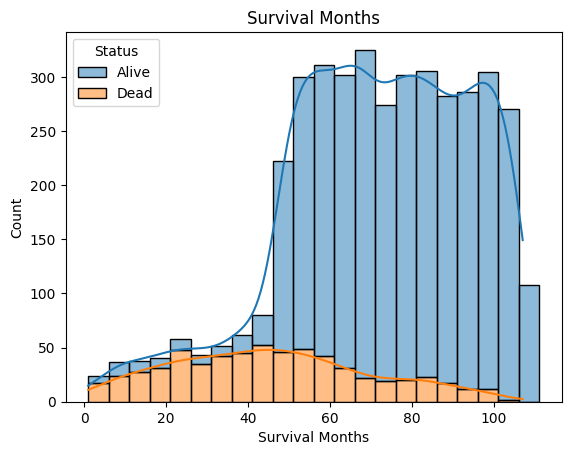

In [18]:
sns.histplot(data=df,x='Survival Months',kde=True,binwidth=5,hue='Status',stat='count',multiple='stack')
plt.title("Survival Months")
plt.show()

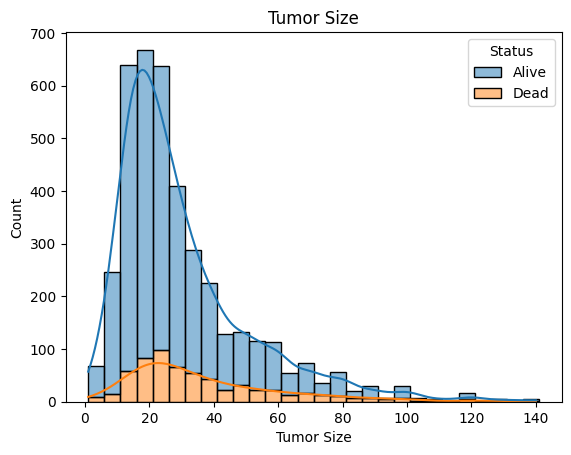

In [19]:
sns.histplot(data=df,x='Tumor Size',kde=True,binwidth=5,hue='Status',stat='count',multiple='stack')
plt.title("Tumor Size")
plt.show()

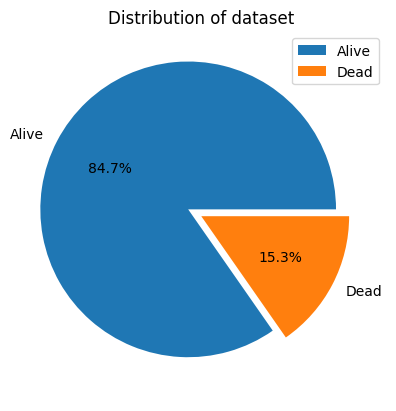

In [20]:
stat = df['Status'].value_counts().reset_index(name='counts')
plt.pie(x='counts',data=stat,labels='Status',autopct='%1.1f%%',explode=[0.1, 0])
plt.title("Distribution of dataset")
plt.legend()
plt.show()

In [21]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

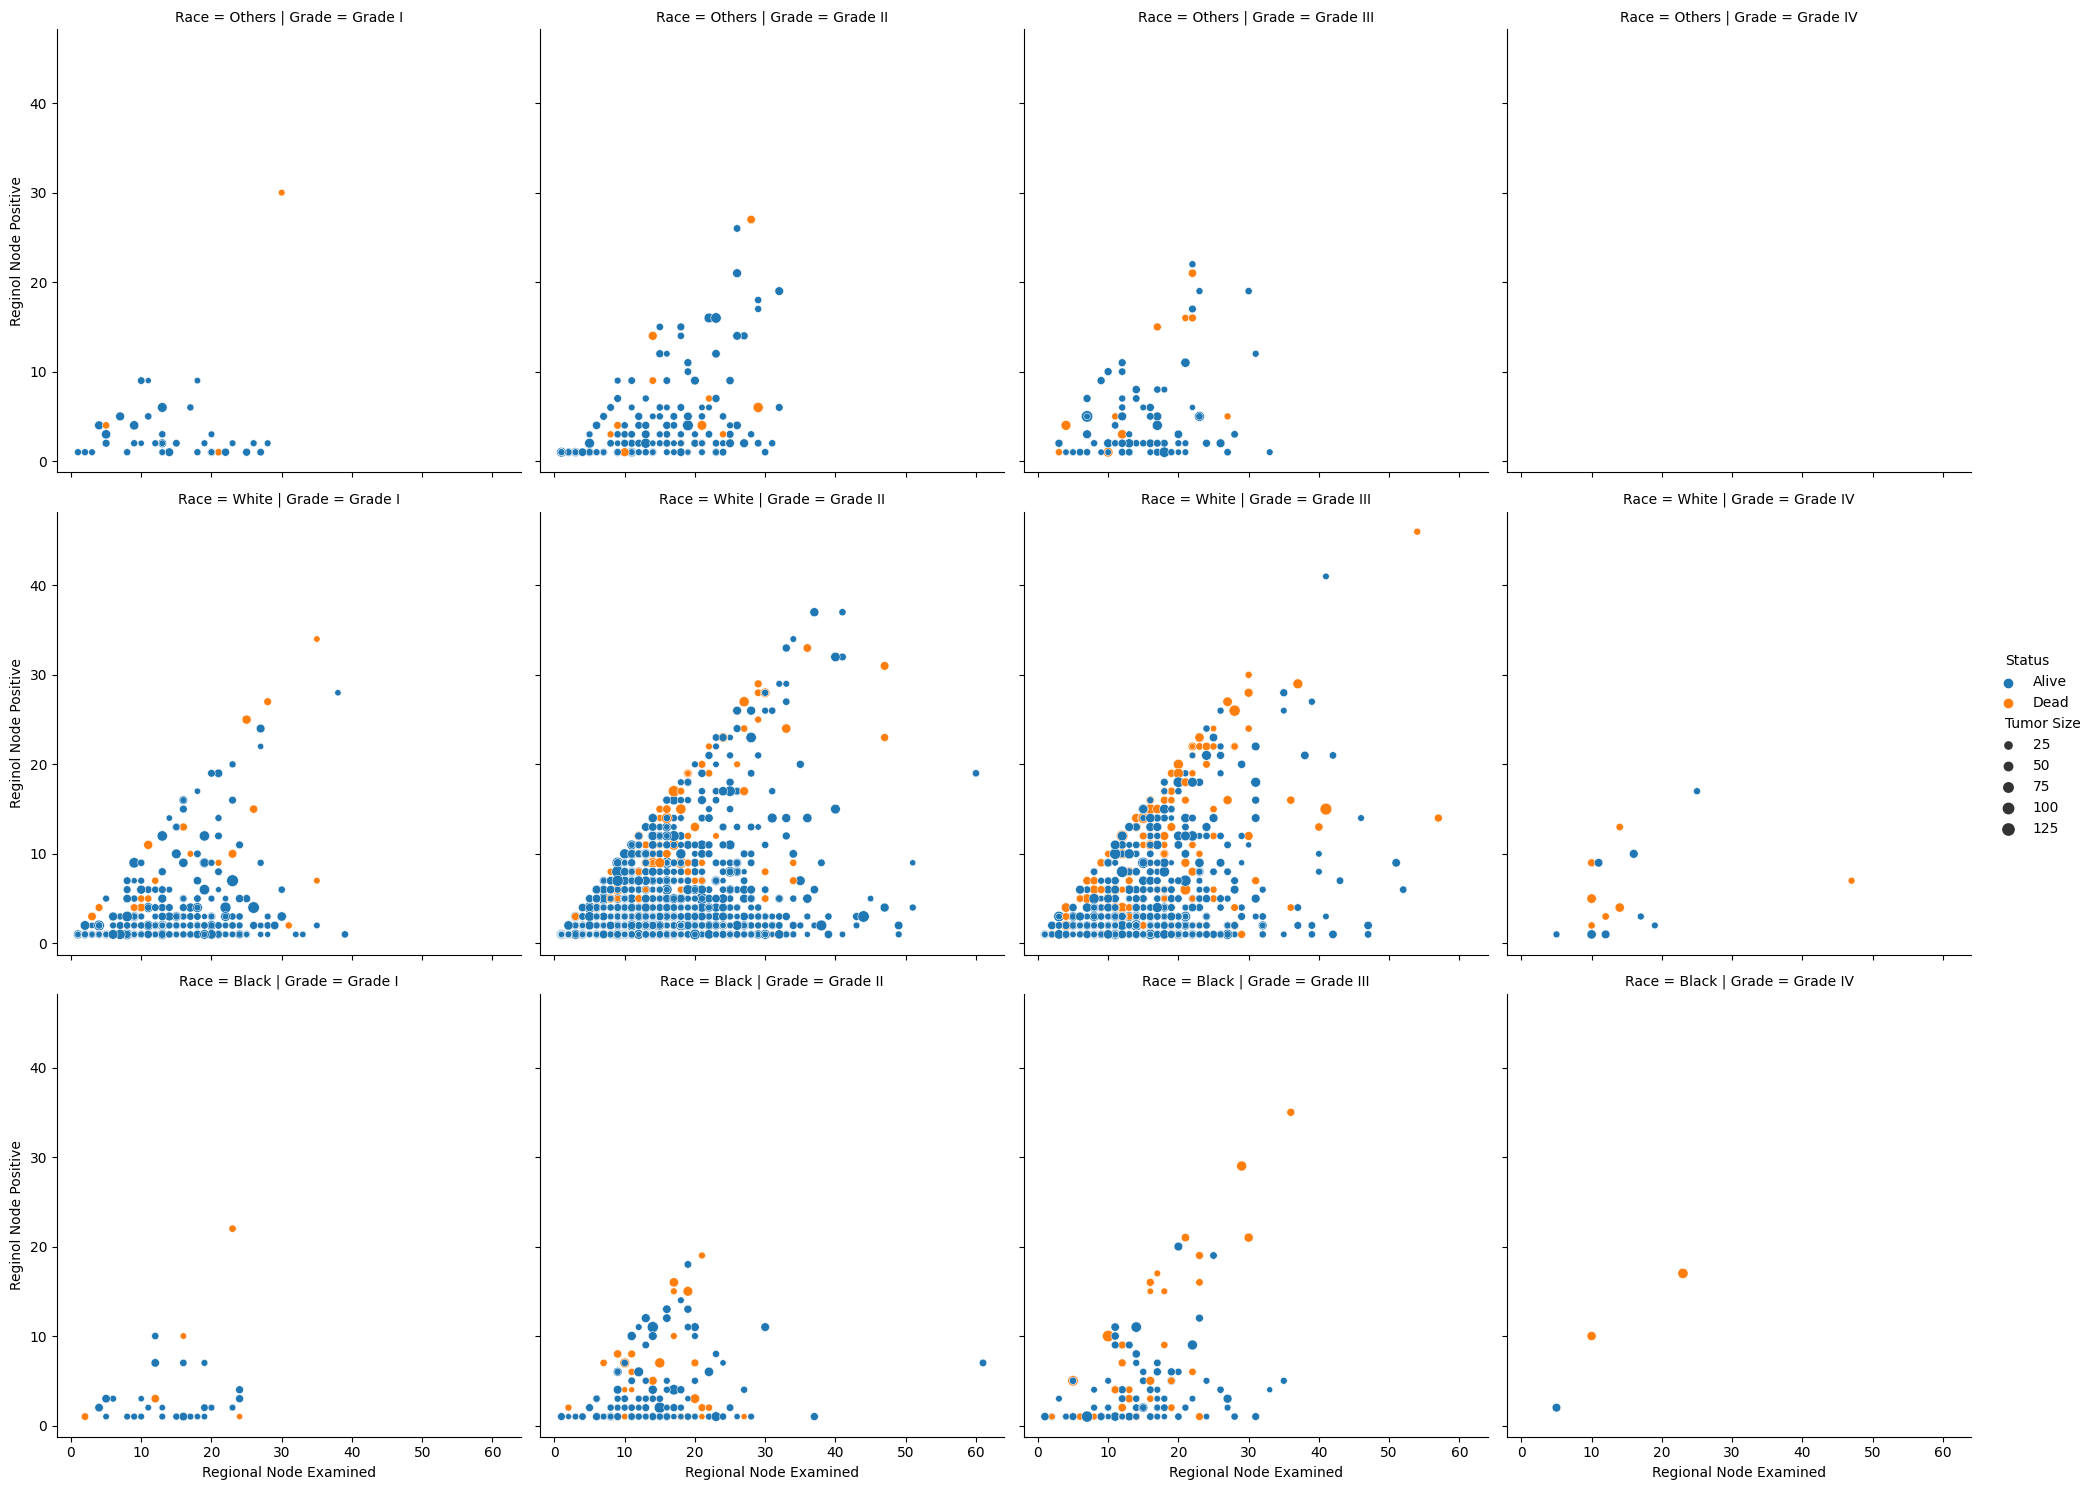

In [22]:
sns.relplot(data=df,x='Regional Node Examined',y='Reginol Node Positive',hue='Status',row='Race',size='Tumor Size',col='Grade')
plt.show()

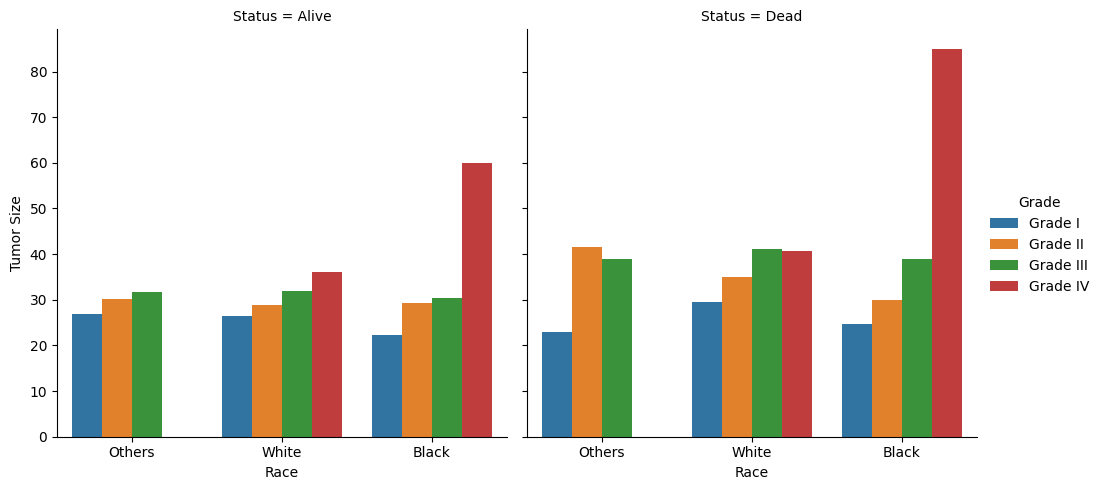

In [23]:
sns.catplot(data=df,x='Race',y='Tumor Size',hue='Grade',kind='bar',col='Status',ci=None)
plt.show()

Black people have large size tumor and grade IV comapred to other people 

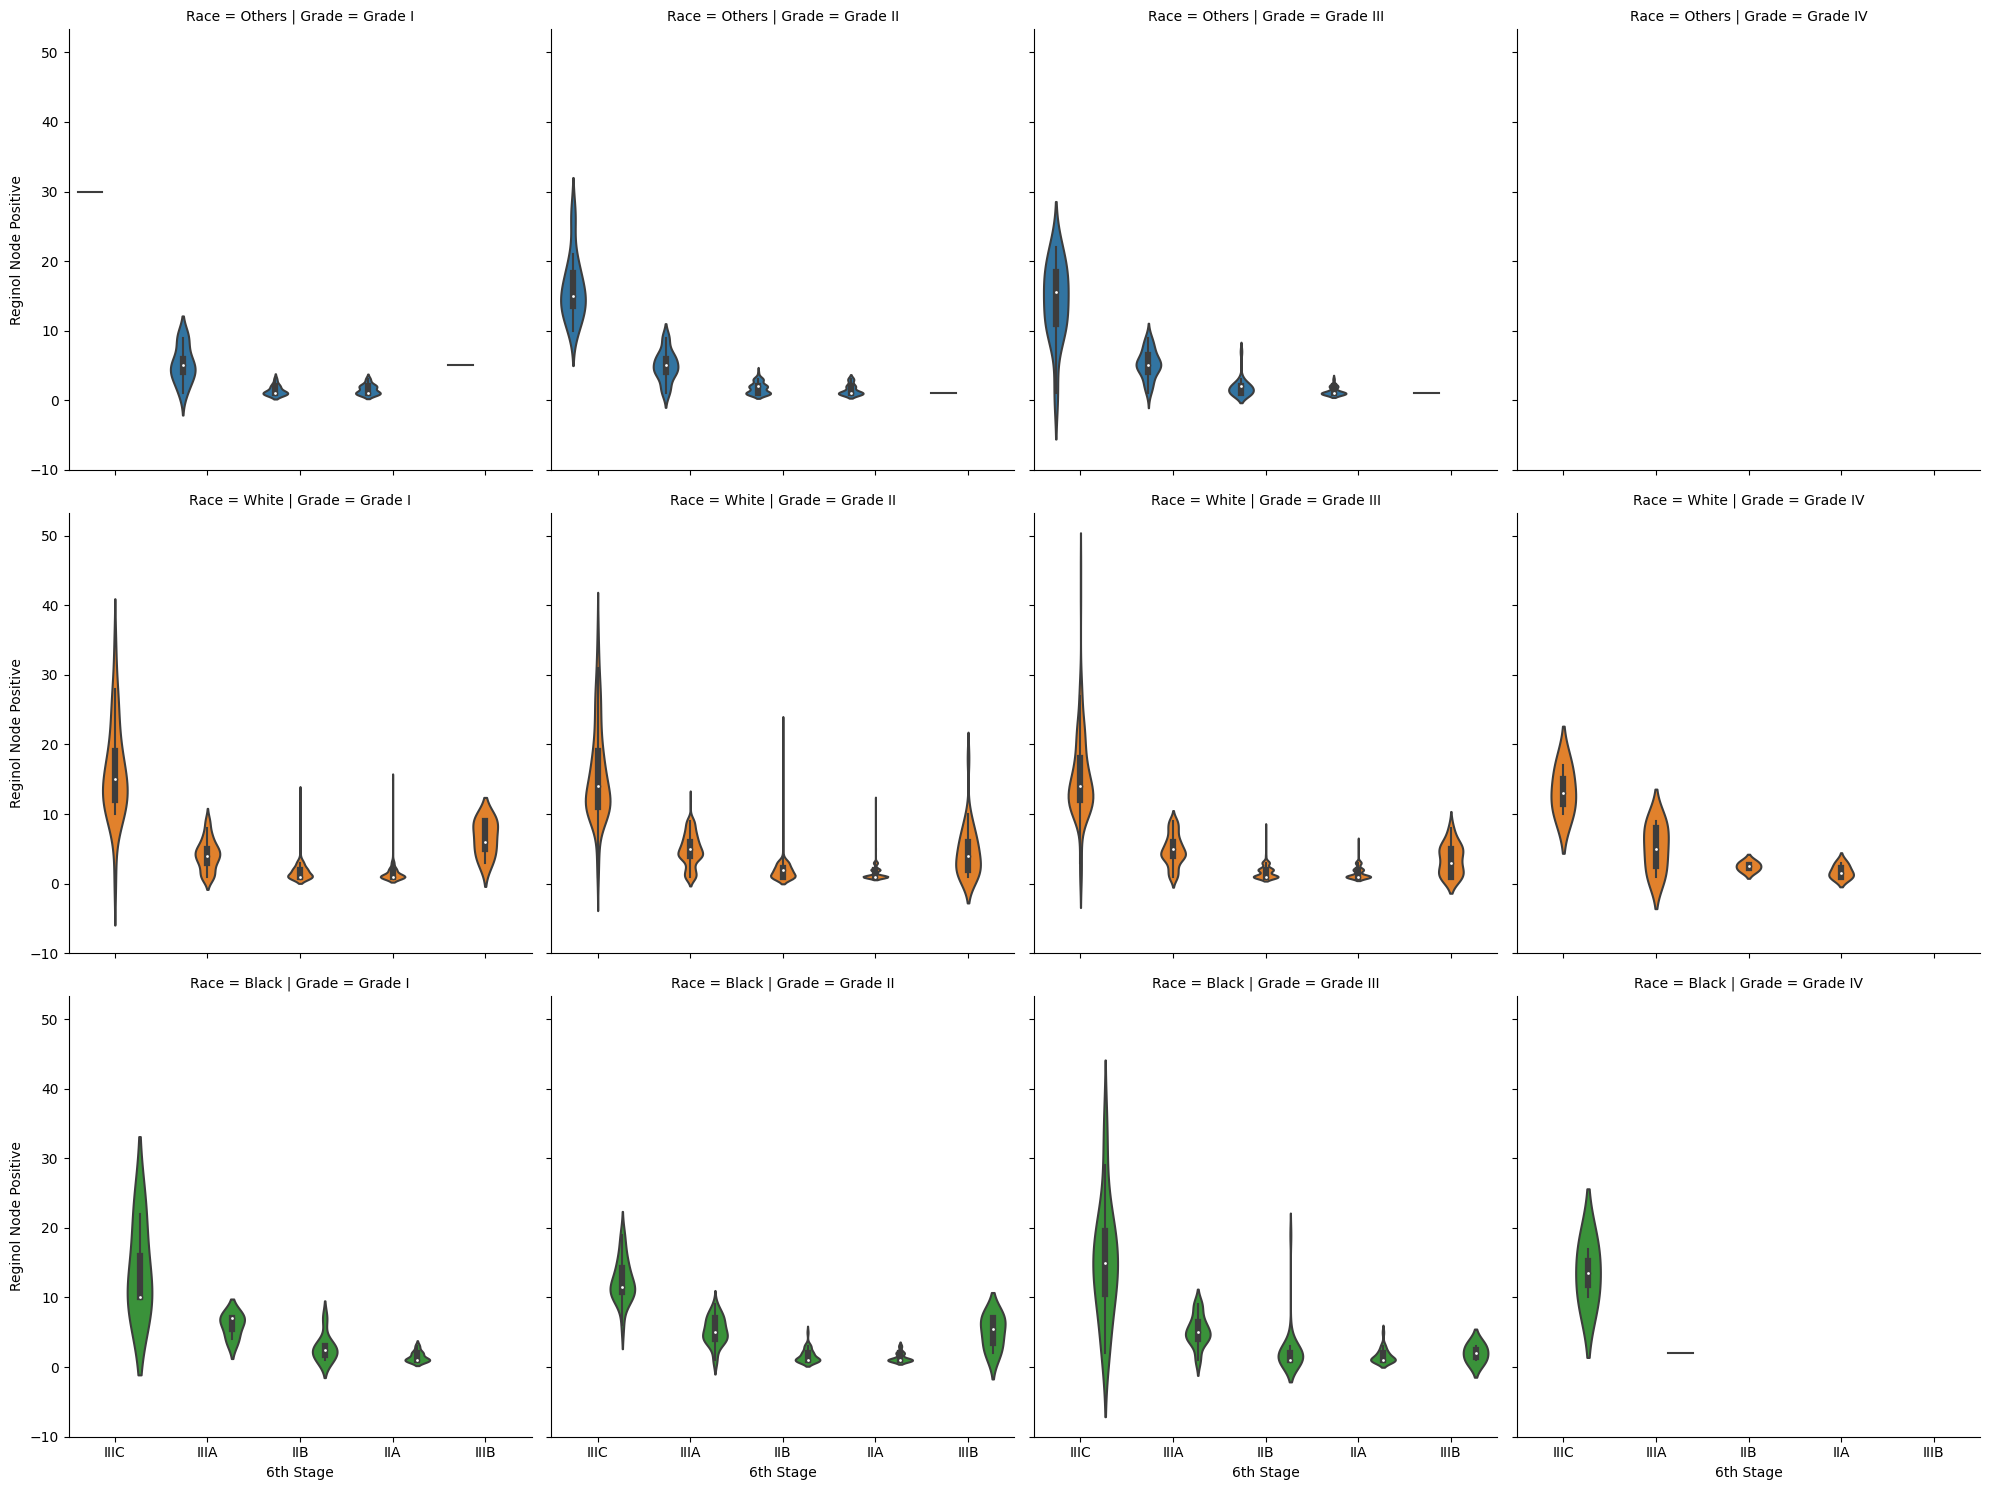

In [24]:
sns.catplot(data=df,x='6th Stage',y='Reginol Node Positive',hue='Race',kind='violin',col='Grade',ci=None,row='Race')
plt.show()

In [25]:
data = df
data['Status'] = df['Status'].replace({'Alive':1,'Dead':0})

In [26]:
sample  = pd.get_dummies(data)
sample.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Race_Black,Race_Others,Race_White,Marital Status_Divorced,...,Grade_Grade I,Grade_Grade II,Grade_Grade III,Grade_Grade IV,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
0,43,40,19,11,1,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,True
1,47,45,25,9,2,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,True
2,67,25,4,1,2,0,False,False,True,False,...,False,False,True,False,False,True,False,True,False,True
3,46,19,26,1,2,0,False,False,True,True,...,False,True,False,False,False,True,False,True,False,True
4,63,35,21,5,3,0,False,False,True,False,...,False,True,False,False,False,True,False,True,False,True


In [27]:
features = sample.columns.drop("Status")
features

Index(['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive',
       'Survival Months', 'Race_Black', 'Race_Others', 'Race_White',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Separated', 'Marital Status_Single',
       'Marital Status_Widowed', 'T Stage_T1', 'T Stage_T2', 'T Stage_T3',
       'T Stage_T4', 'N Stage_N1', 'N Stage_N2', 'N Stage_N3', '6th Stage_IIA',
       '6th Stage_IIB', '6th Stage_IIIA', '6th Stage_IIIB', '6th Stage_IIIC',
       'Grade_Grade I', 'Grade_Grade II', 'Grade_Grade III', 'Grade_Grade IV',
       'A Stage_Distant', 'A Stage_Regional', 'Estrogen Status_Negative',
       'Estrogen Status_Positive', 'Progesterone Status_Negative',
       'Progesterone Status_Positive'],
      dtype='object')

In [28]:
X = sample.drop('Status',axis=1).values
y = sample['Status'].values

In [29]:
#Import the fucntions to find accuracy and split data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#import models incuding the voting classifier model

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.ensemble import VotingClassifier

#set the seed for reproducability
SEED =1


#split the data into 30% test 70% teain
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=SEED)

#Instantiate the models 
lr = LogisticRegression(random_state=SEED)
knn = kNN()
dt = DecisionTreeClassifier(random_state=SEED)

#define a list contains classfier tuple with (classifier name, classifer)

classifer = [('LogisticRegression',lr),('KNeighborsClassifier',knn),('DecisionTreeClassifier',dt)]


for clf_name,clf in classifer:

    #fit the model to each classifier
    clf.fit(X_train,y_train)

    #predict the models for each classifer
    y_pred = clf.predict(X_test)

    #Evaluvate the accuracy on test set
    print(f"{clf_name} : {accuracy_score(y_test,y_pred):.3f}")



LogisticRegression : 0.878
KNeighborsClassifier : 0.883
DecisionTreeClassifier : 0.817


KNeighborsClassifier model provides highest accuracy of 88.3%

## Bagging - Bootstrap Aggregation

In [30]:
# import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#set Seed for reproducability
SEED = 20

#split 70% data for trainnig and 30% for test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=SEED,stratify=y)

#Iniitate dt
lg = LogisticRegression(random_state=SEED)

bg = BaggingClassifier(base_estimator=lg,n_estimators=300,n_jobs=-1)

bg.fit(X_train,y_train)
y_pred = bg.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)

print(f"Accuracy value of bagging model for LogisticRegression  : {accuracy}")

Accuracy value of bagging model for LogisticRegression  : 0.9056291390728477


Accuracy value of bagging model for DecisionTreeClassifier  : 90.35%

## Out of bag evaluation

In [31]:
# import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#set Seed for reproducability
SEED = 2022

#split 70% data for trainnig and 30% for test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=SEED,stratify=y)

bg = BaggingClassifier(base_estimator=lg,n_estimators=300,n_jobs=-1,oob_score=True)

bg.fit(X_train,y_train)
y_pred = bg.predict(X_test)

test_accuracy = accuracy_score(y_test,y_pred)

oob_accuracy = bg.oob_score_

print(f"Test set Accuracy : {test_accuracy}")
print(f"OOB set Accuracy : {oob_accuracy}")

Test set Accuracy : 0.8981788079470199
OOB set Accuracy : 0.8934659090909091


### Bagging classifier with Logistic regression provides best accuracy for predicting Alive Status
LogisticRegression prediction accuracy = 90.3%

In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'base_estimator': [LogisticRegression(penalty='elasticnet'),LogisticRegression(solver='sag'),LogisticRegression()],
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False]
}

# Create the BaggingClassifier
bagging_clf = BaggingClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=bagging_clf, param_grid=param_grid, cv=5,n_jobs=-1)

# Fit the data to perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"best parameter{best_params}")
print(f"best score {best_score}")

y_pred = grid_search.predict(X_test)
y_pred_prob = grid_search.predict_proba(X_test)[:,1]


best parameter{'base_estimator': LogisticRegression(), 'bootstrap': True, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 10}
best score 0.8924026554803925


In [33]:
y_pred_prob = grid_search.predict_proba(X_test)[:,1]

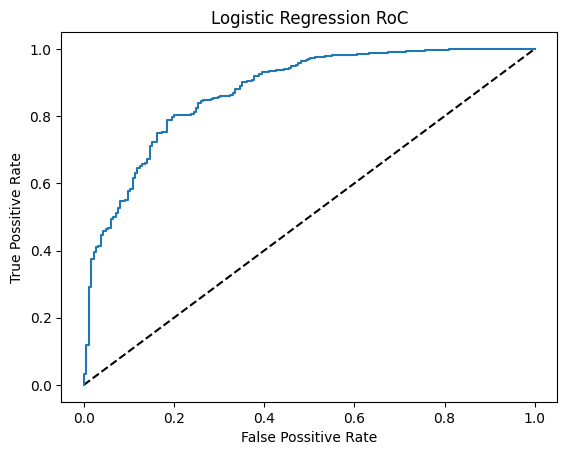

In [35]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel("False Possitive Rate")
plt.ylabel("True Possitive Rate")
plt.title("Logistic Regression RoC")
plt.show()